In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from rdfrun import *
from benchmark_queries import *
import time
%matplotlib inline
PREFIX = 'sdh'

In [70]:
def overlap_hist(df):
    plt.clf()
    bins = pd.np.linspace(0, df.max().max(), 100)
    for col in df.columns:
        plt.hist(df[col], alpha=0.5, label=col)
    plt.legend(loc='upper right')
    plt.show()
def overlap_cdf(df,title=''):
    plt.clf()
    plt.figure()
    for col in df.columns:
        #plt.hist(df[col], alpha=0.5, label=col)
        ax = df[col].hist(cumulative=True, normed=1, bins=100, histtype='step',label=col)
        #x.set_label(col)
    plt.legend(loc='lower right')
    ax.get_figure().set_dpi(200)
    plt.xlabel("Latency (ms)")
    plt.ylabel("Proportion")
    plt.title(title)
def boxplot(df,title=''):
    ax = df[df < df.max()].boxplot()
    ax.get_figure().set_dpi(200)
    plt.xlabel('DB')
    plt.ylabel('Latency (ms)')
    plt.yscale('log')
    plt.tight_layout()
def get_summary(df):
    s = pd.DataFrame({
        'mean': df.mean(),
        'std': df.std(),
        '.99': df.quantile(.99),
        'max': df.max()
    })
    s = s[['mean','std','.99','max']]
    s = s.reindex(["fuseki","allegro","blaze","rdflib","rdf3x","hod"])
    entries = []
    for r in s.values:
        entries.append('/'.join(['{0:0.0f}'.format(x) for x in r]))
    print(' & '.join(entries))
    return s

In [71]:
vavdf = pd.read_csv(PREFIX+'vavenum.csv')

In [72]:
get_summary(vavdf)

14/13/34/183 & 19/10/37/150 & 28/20/69/264 & 32/7/53/56 & 9/3/19/22 & 6/2/12/18


,mean,std,.99,max
fuseki,14.128784,12.915379,33.806501,183.348145
allegro,19.232069,10.294073,37.134402,149.632812
blaze,27.984363,19.719557,69.110649,264.240723
rdflib,32.096456,7.384001,53.142588,56.105225
rdf3x,8.554402,2.832237,18.694968,22.081299
hod,6.188551,1.634709,12.114072,18.447266


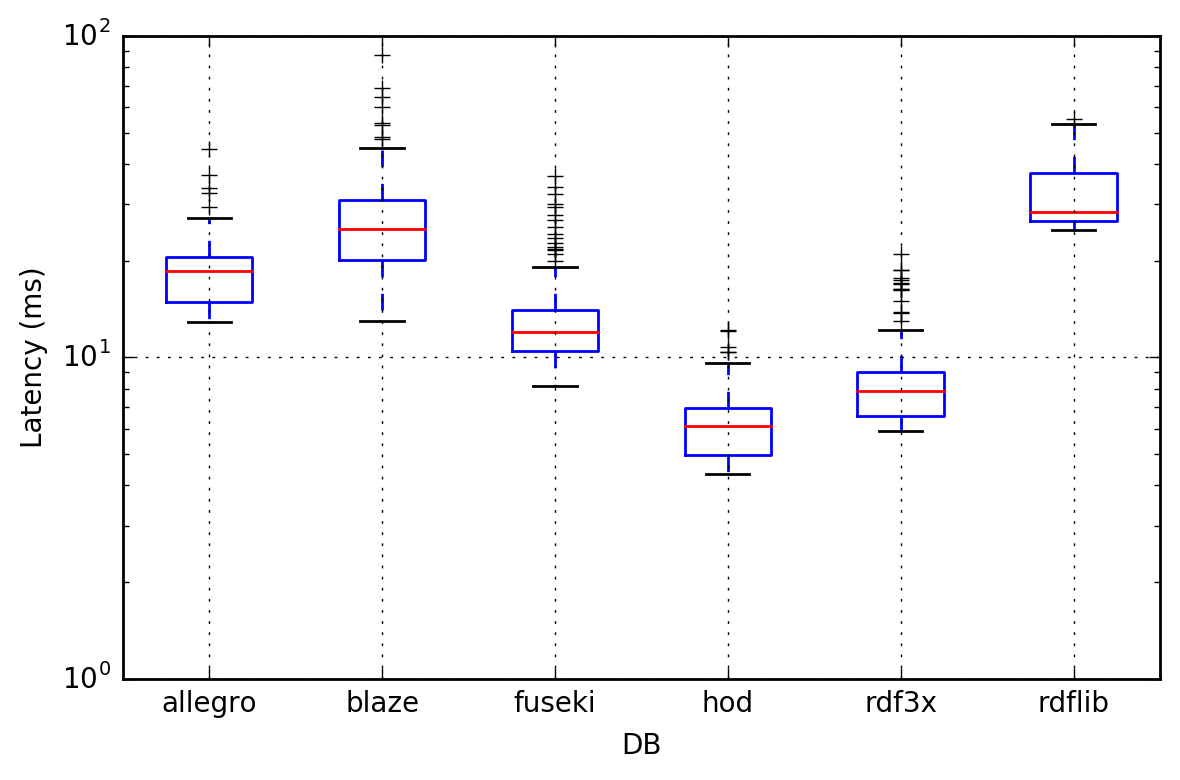

In [73]:
boxplot(vavdf)

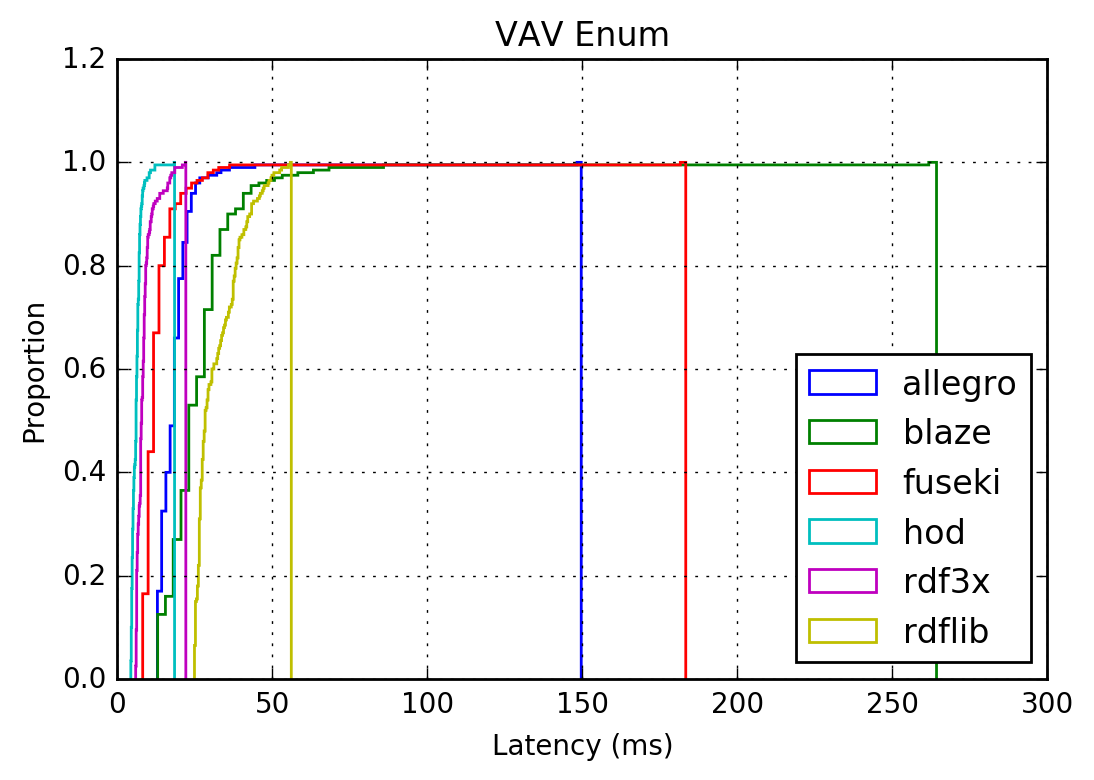

In [74]:
fig = overlap_cdf(vavdf,"VAV Enum")

In [75]:
tempsensedf = pd.read_csv(PREFIX+'tempsense.csv')

In [76]:
get_summary(tempsensedf)

22/20/56/289 & 110/15/153/232 & 61/24/118/337 & 40/8/60/83 & 7/2/13/15 & 6/2/14/20


,mean,std,.99,max
fuseki,22.413655,20.303146,55.539006,289.298584
allegro,110.312179,15.135424,152.995713,231.871826
blaze,60.975620,23.923832,118.213972,336.548096
rdflib,40.087502,8.128287,60.115735,82.723389
rdf3x,6.972843,1.802519,12.950581,15.329346
hod,6.464170,2.106009,13.720193,19.553711


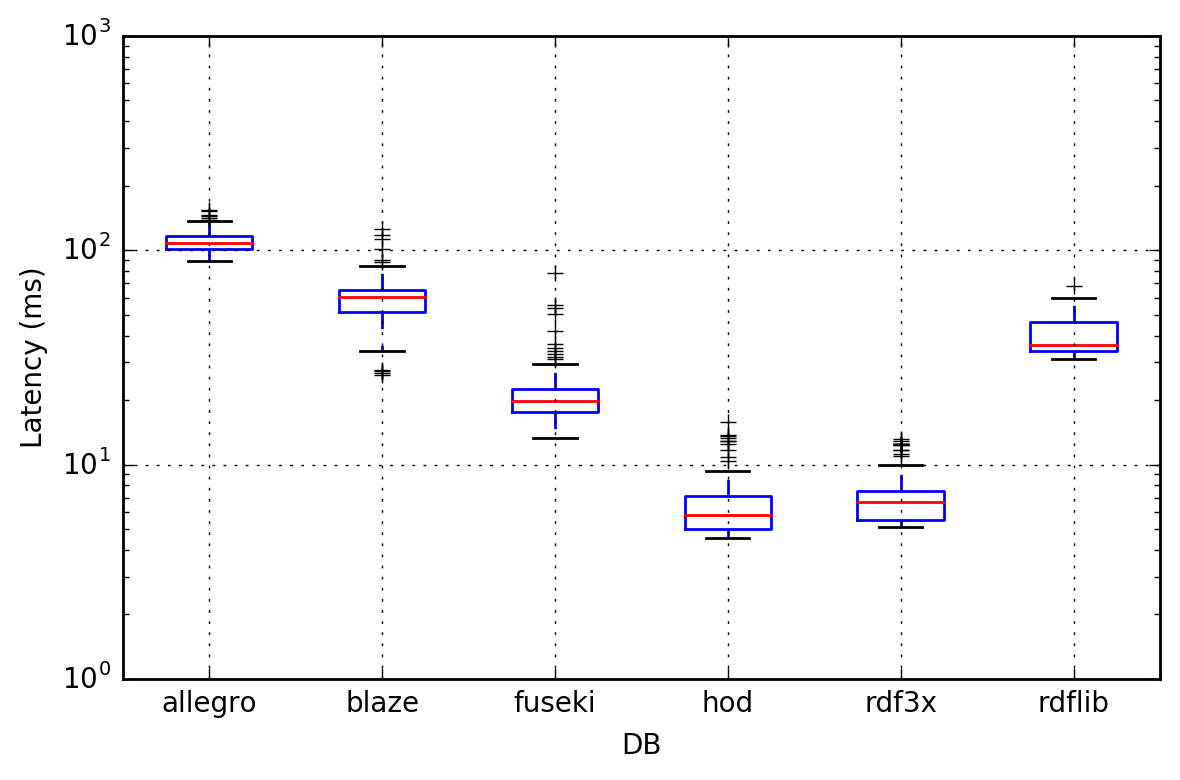

In [77]:
boxplot(tempsensedf)

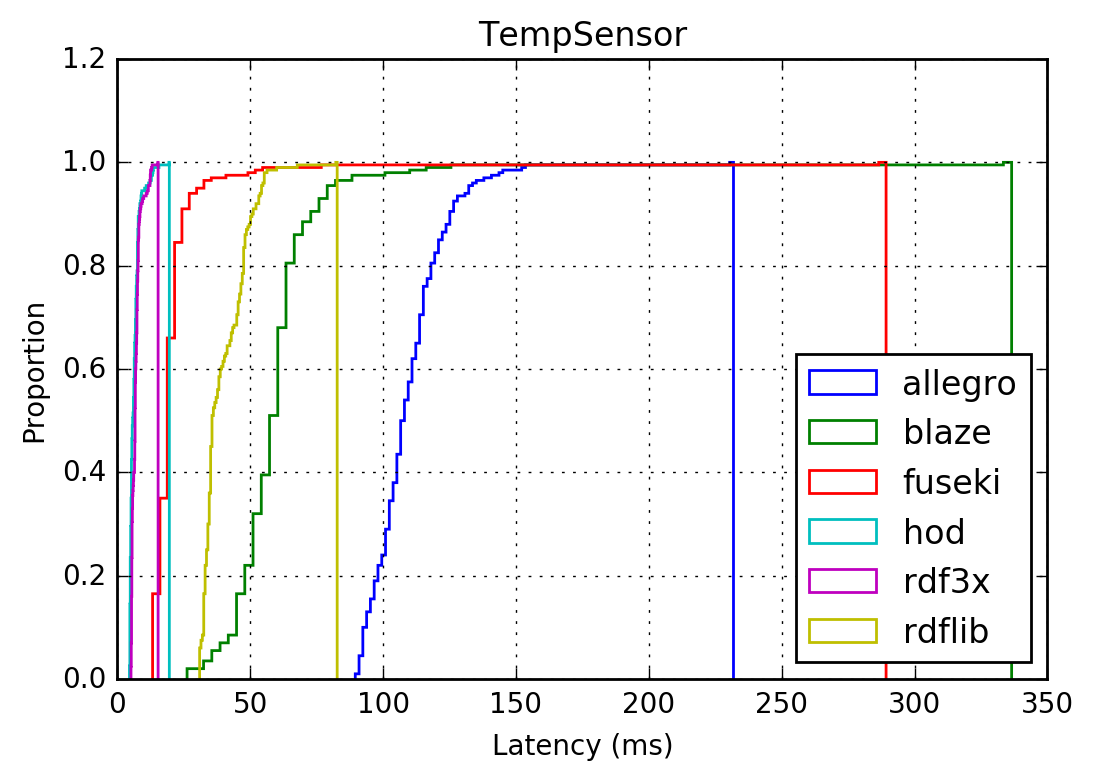

In [78]:
fig = overlap_cdf(tempsensedf,"TempSensor")

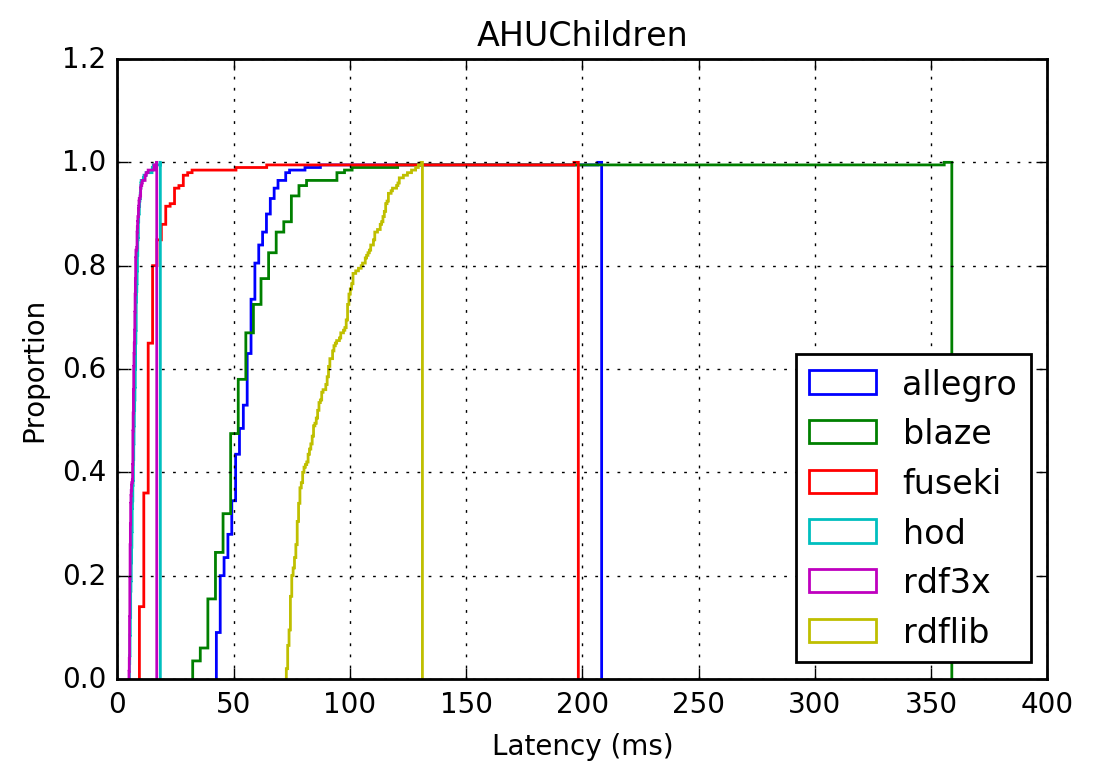

In [79]:
ahuchildren = pd.read_csv(PREFIX+'ahuchildren.csv')
overlap_cdf(ahuchildren,"AHUChildren")

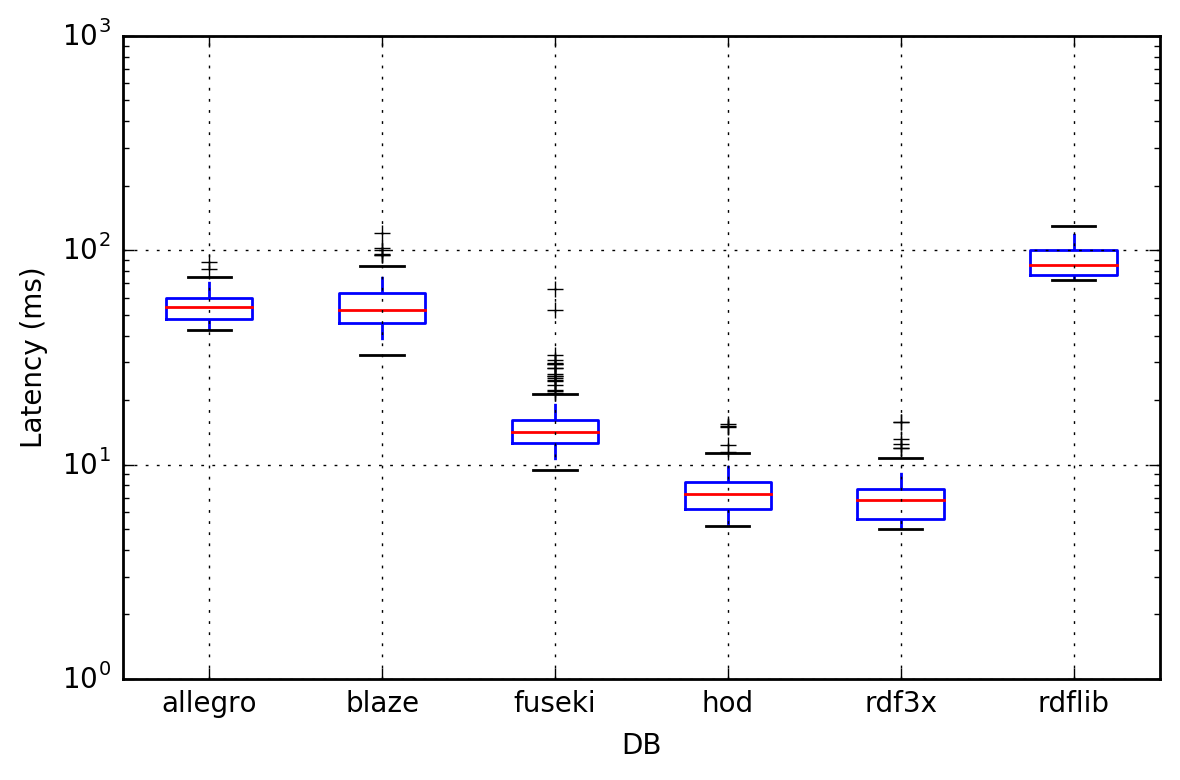

In [80]:
boxplot(ahuchildren)

In [81]:
get_summary(ahuchildren)

16/14/53/198 & 55/14/82/208 & 57/26/103/359 & 90/16/128/131 & 7/2/16/17 & 8/2/15/18


,mean,std,.99,max
fuseki,16.480087,14.335054,53.004661,198.257568
allegro,55.459670,13.607490,81.737969,208.285645
blaze,57.189586,25.684390,103.091904,358.900879
rdflib,90.354733,15.506793,128.394895,131.199707
rdf3x,7.078676,1.891589,15.781267,16.936035
hod,7.553568,1.853053,15.148733,18.485596


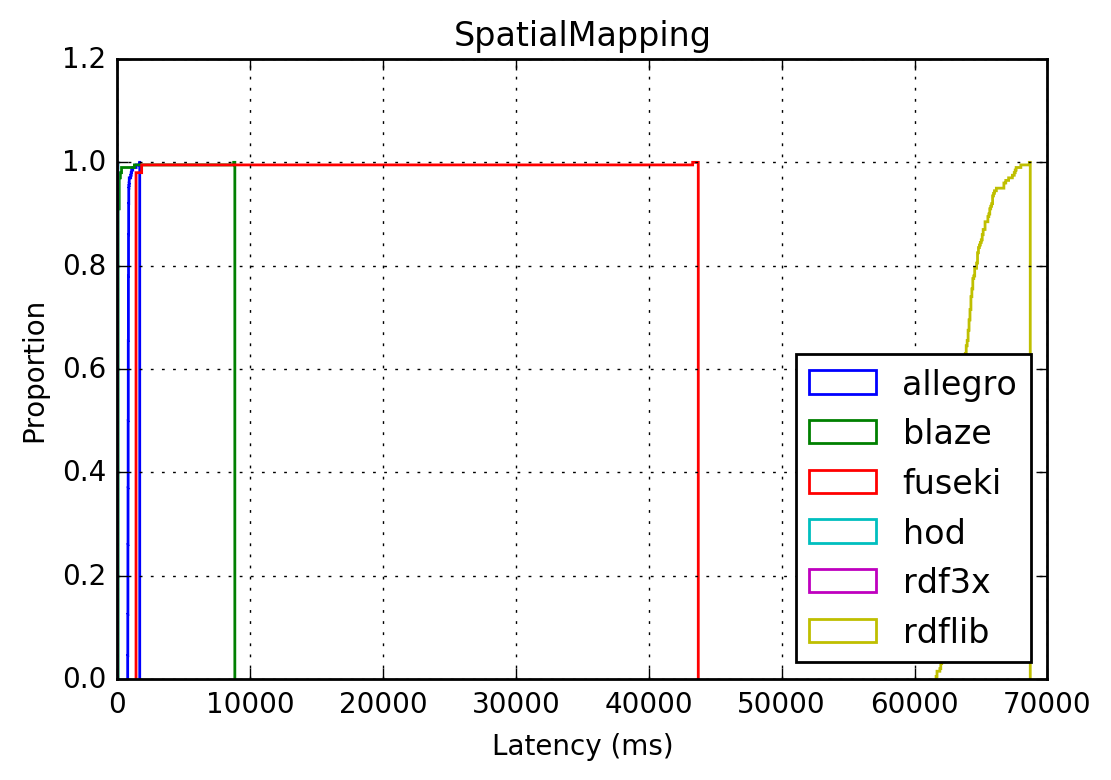

In [82]:
spatialmapping = pd.read_csv(PREFIX+"spatialmapping.csv")
overlap_cdf(spatialmapping, "SpatialMapping")

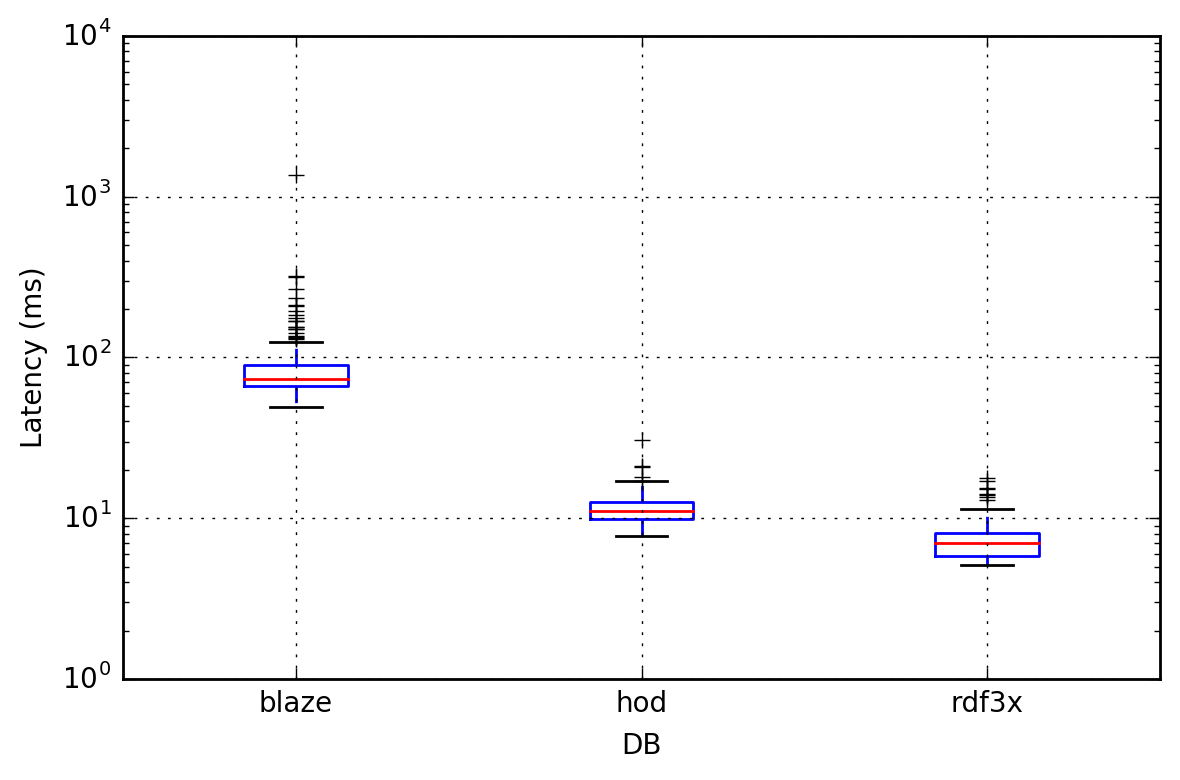

In [83]:
boxplot(spatialmapping[['blaze','hod','rdf3x']])

In [84]:
get_summary(spatialmapping)

1759/2984/2012/43724 & 832/85/1161/1683 & 137/626/332/8841 & 63802/1303/67699/68712 & 7/2/17/20 & 12/3/21/34


,mean,std,.99,max
fuseki,1759.229982,2983.572685,2011.695312,43723.701660
allegro,831.874706,85.167451,1161.496147,1682.594482
blaze,136.939142,626.451020,331.821616,8841.061035
rdflib,63801.846929,1303.338344,67698.943301,68711.748535
rdf3x,7.482396,2.233994,16.953137,19.626465
hod,11.542684,3.138851,21.229937,34.466553


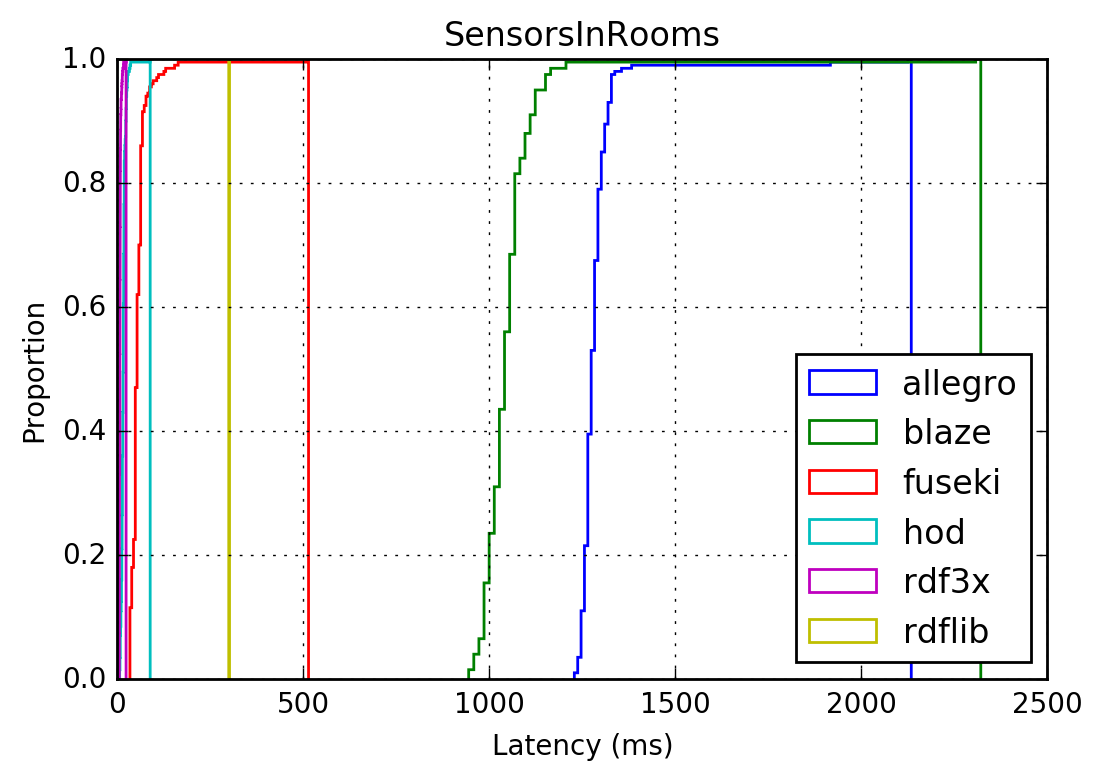

In [85]:
sensorsinrooms = pd.read_csv(PREFIX+"sensorsinrooms.csv")
overlap_cdf(sensorsinrooms, "SensorsInRooms")

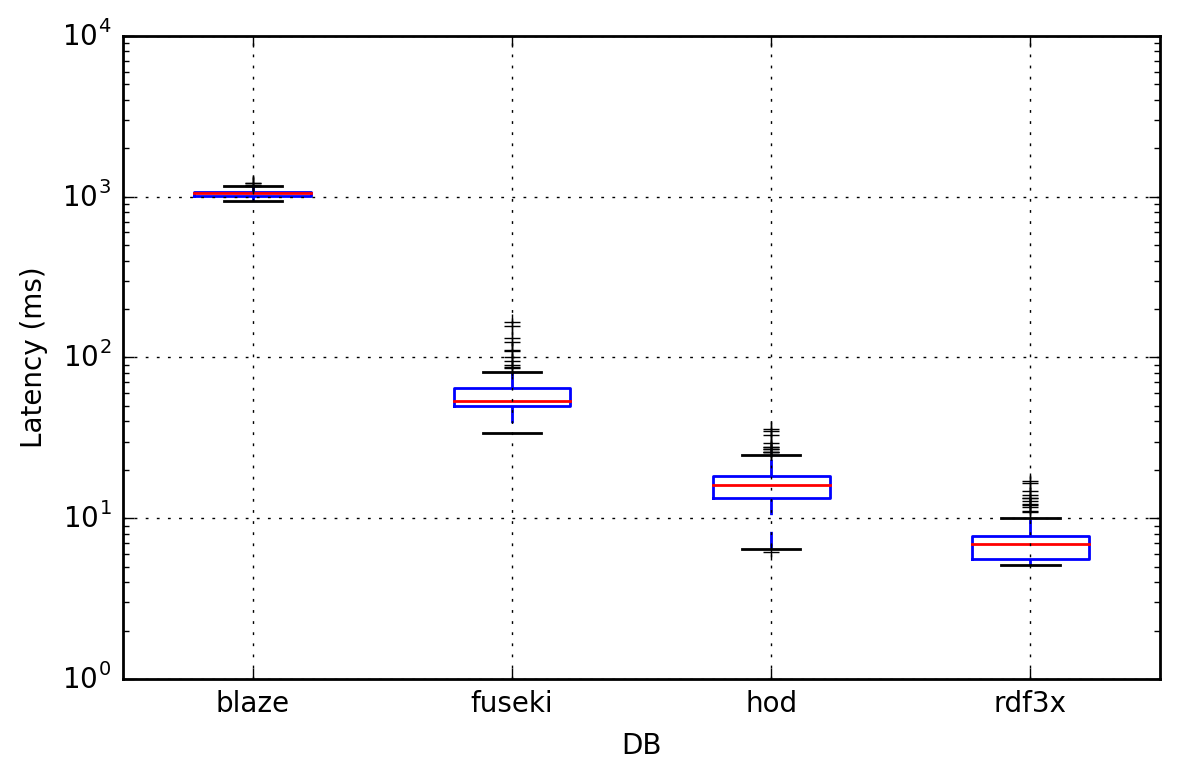

In [86]:
boxplot(sensorsinrooms[['blaze','fuseki','hod','rdf3x']])

In [87]:
get_summary(sensorsinrooms)

59/37/157/514 & 1290/79/1391/2134 & 1056/102/1212/2321 & 300/0/300/300 & 7/2/17/23 & 16/7/35/88


,mean,std,.99,max
fuseki,59.386733,37.115255,156.677561,513.887207
allegro,1290.467767,78.857627,1391.334431,2134.127930
blaze,1056.254995,102.249325,1212.349224,2320.998047
rdflib,300.000000,0.000000,300.000000,300.000000
rdf3x,7.232500,2.288255,16.509495,23.399902
hod,16.493834,7.179141,34.740129,88.185059


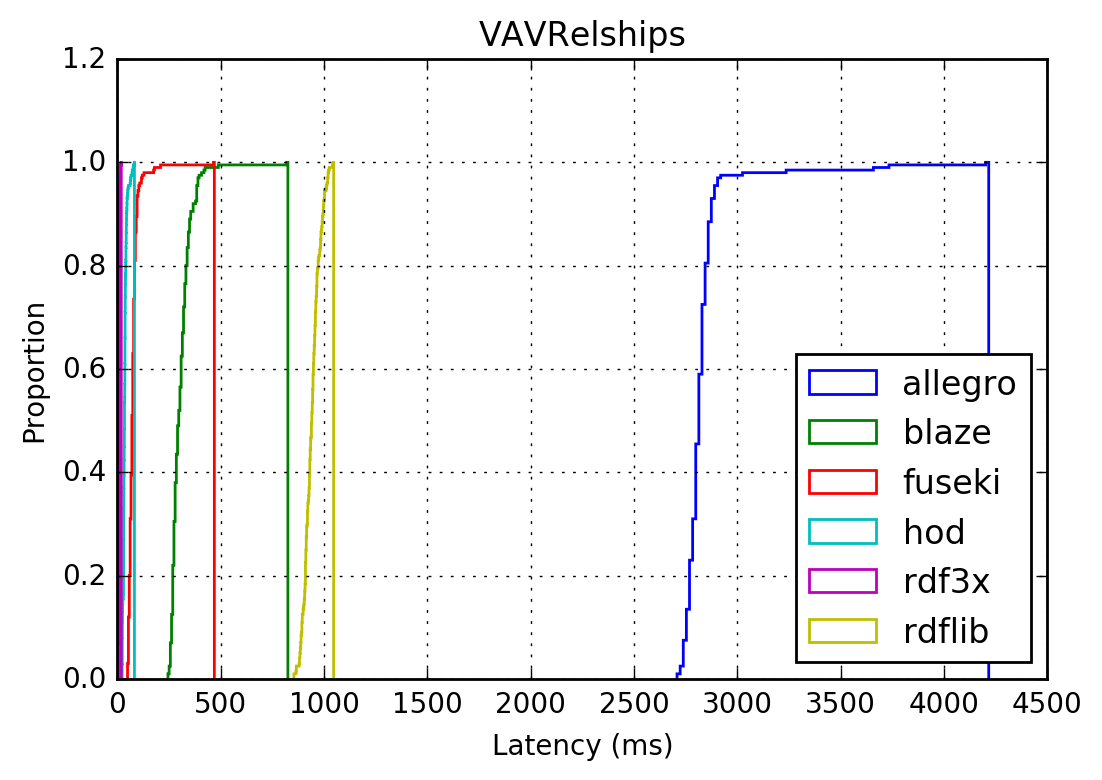

In [88]:
vavrelships = pd.read_csv(PREFIX+"vavrelships.csv")
overlap_cdf(vavrelships, "VAVRelships")

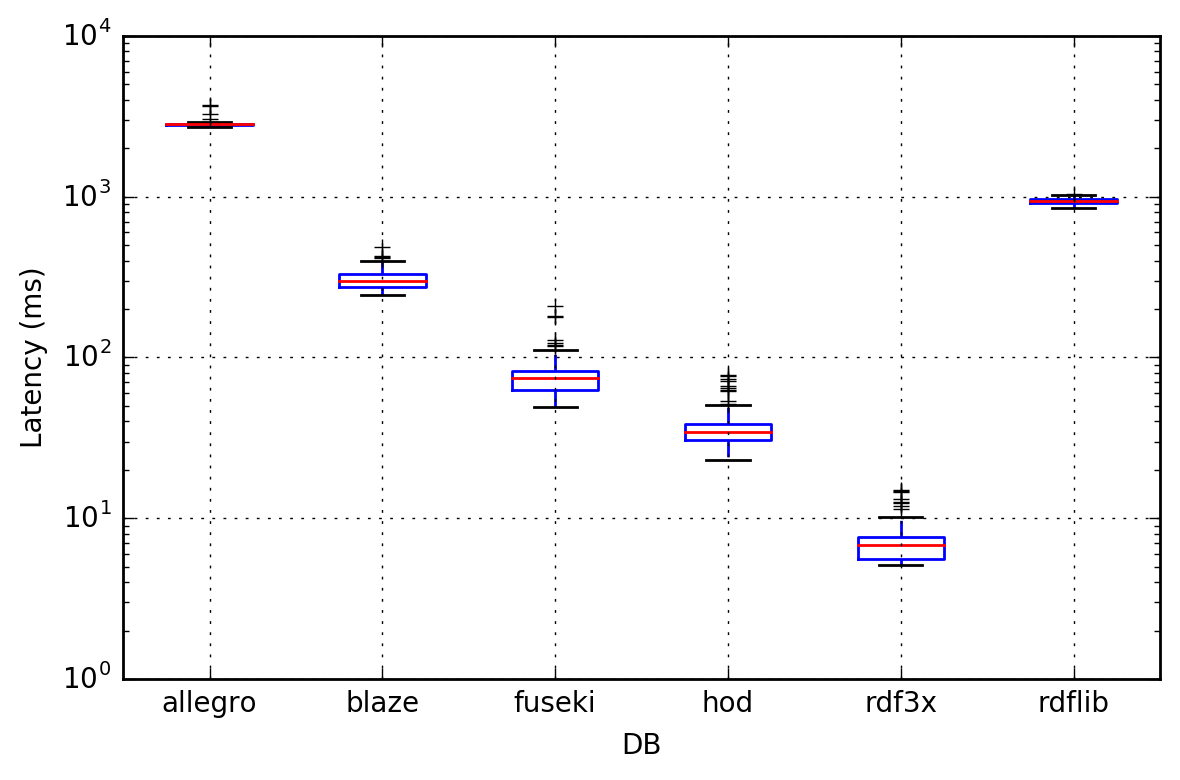

In [89]:
boxplot(vavrelships)

In [90]:
get_summary(vavrelships)

78/34/182/469 & 2836/142/3661/4216 & 310/54/431/825 & 942/38/1027/1046 & 7/2/15/19 & 36/10/77/83


,mean,std,.99,max
fuseki,78.209281,34.415236,182.370625,469.180908
allegro,2835.650646,142.319970,3661.141436,4216.215088
blaze,309.769692,54.196297,430.642009,825.043457
rdflib,942.233206,37.859259,1027.085557,1046.471191
rdf3x,7.049037,1.977024,14.858242,18.840820
hod,35.987169,9.990042,77.085488,82.526611


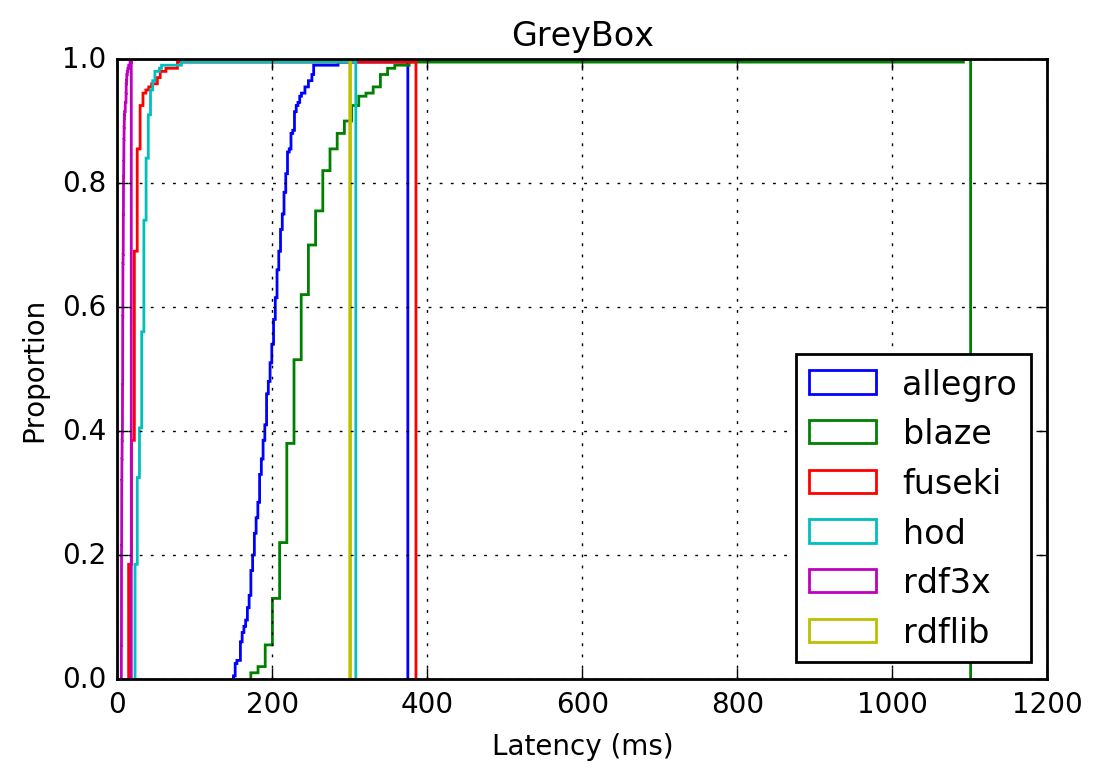

In [91]:
greybox = pd.read_csv(PREFIX+"greybox.csv")
overlap_cdf(greybox, "GreyBox")

In [92]:
get_summary(greybox)

26/27/79/385 & 199/27/255/375 & 249/72/362/1101 & 300/0/300/300 & 7/2/15/18 & 35/21/58/308


,mean,std,.99,max
fuseki,26.465426,27.101454,79.123062,385.262451
allegro,199.336987,27.080588,254.773586,374.781738
blaze,249.221053,71.531492,362.351860,1100.953369
rdflib,300.000000,0.000000,300.000000,300.000000
rdf3x,7.132078,2.029153,14.674917,17.947998
hod,34.642958,20.925595,57.513948,307.696289


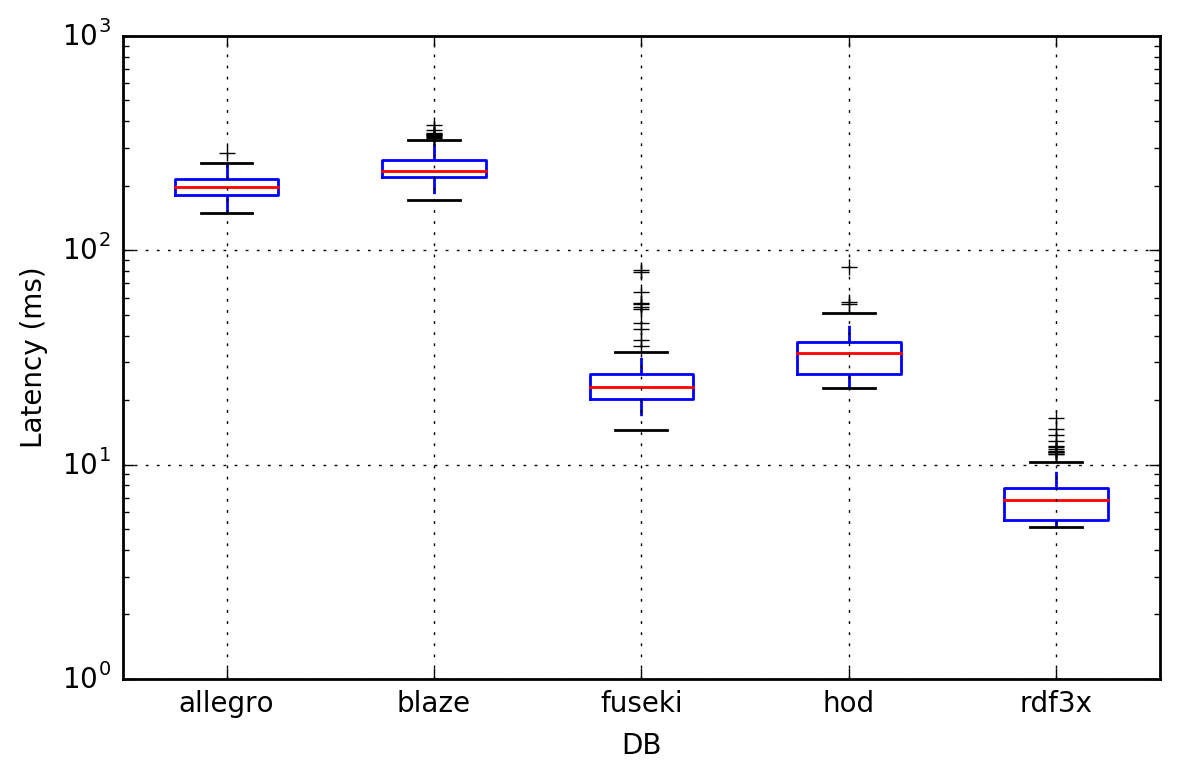

In [93]:
boxplot(greybox[['allegro','blaze','fuseki','hod','rdf3x']])

In [94]:
alldfs = [vavdf, tempsensedf, ahuchildren, spatialmapping, sensorsinrooms, vavrelships, greybox]

In [95]:
means = pd.DataFrame(list(map(lambda x: dict(x.mean()), alldfs)))

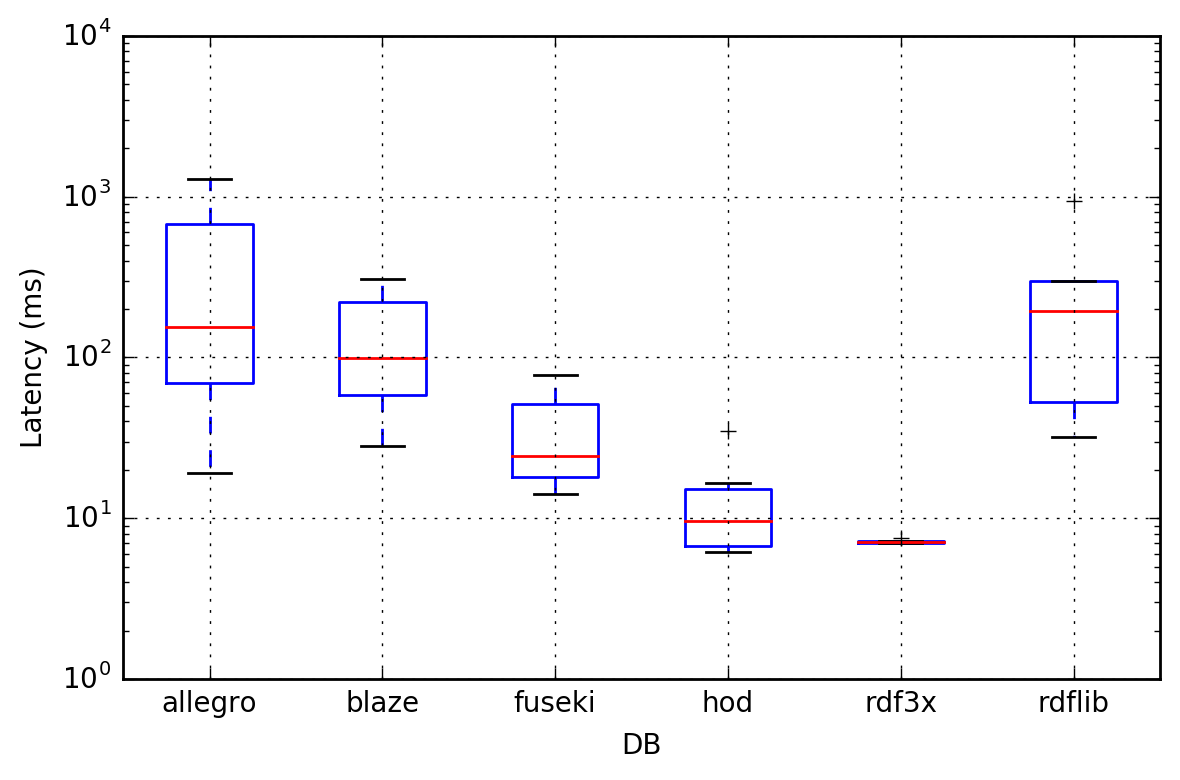

In [96]:
boxplot(means)

In [97]:
pct99 = pd.DataFrame(list(map(lambda x: dict(x.quantile(.99)), alldfs)))

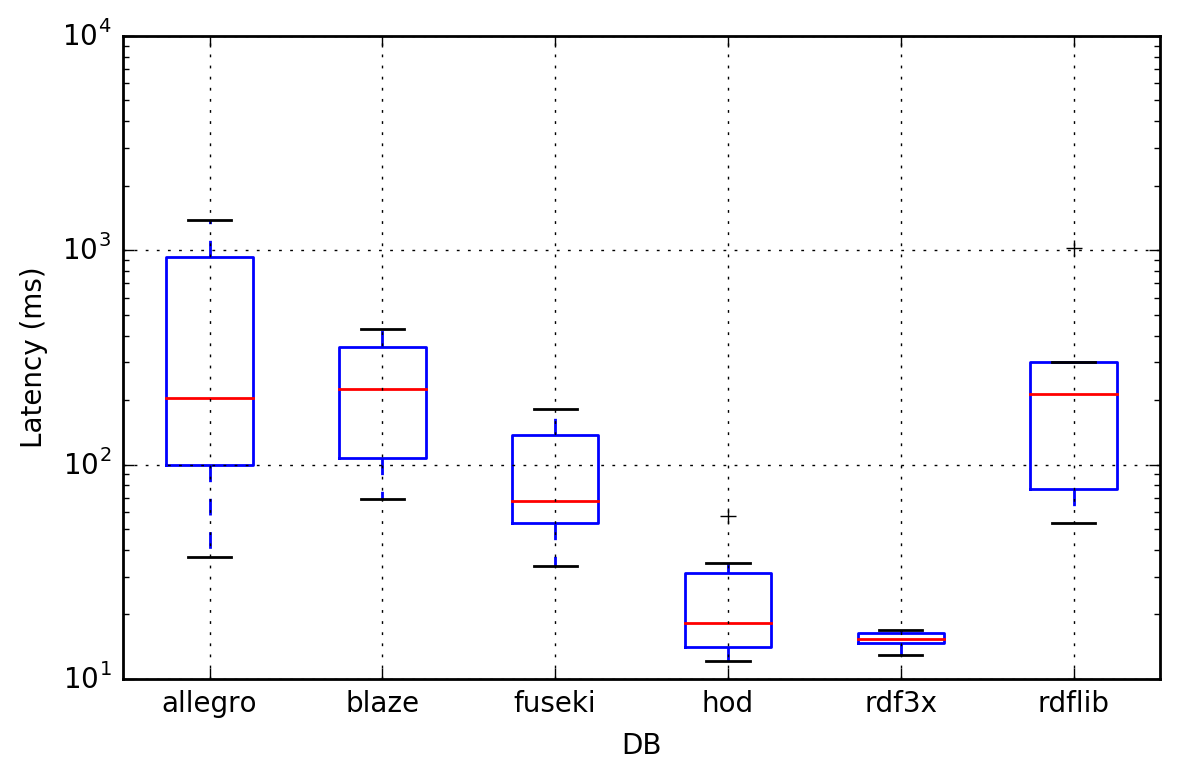

In [98]:
boxplot(pct99)